# Light curve fitting

In [1]:
from __future__ import print_function

import numpy as np
import sncosmo
import matplotlib as mpl

%matplotlib inline

mpl.rc('savefig', dpi=110.0)

### Example data

In [2]:
data = sncosmo.read_lc('data/lc-SDSS19230.list', format='salt2')

In [3]:
# data is an astropy Table
print(data)

   Date     Flux  Fluxerr  ZP   Filter MagSys
--------- ------- ------- ---- ------- ------
54346.219   22.71  21.718 27.5 SDSS::g AB_B12
54346.219   -2.46  27.534 27.5 SDSS::r AB_B12
54346.219   20.46  41.593 27.5 SDSS::i AB_B12
54346.219 -115.03 125.221 27.5 SDSS::z AB_B12
54346.219   -28.6  51.474 27.5 SDSS::u AB_B12
54356.262     4.5  16.025 27.5 SDSS::g AB_B12
54356.262   26.08  24.989 27.5 SDSS::r AB_B12
54356.262  -46.38  38.447 27.5 SDSS::i AB_B12
54356.262   73.92 111.835 27.5 SDSS::z AB_B12
54356.262   45.81    47.5 27.5 SDSS::u AB_B12
      ...     ...     ...  ...     ...    ...
54425.156  233.95 130.631 27.5 SDSS::z AB_B12
54425.156  102.74 117.493 27.5 SDSS::u AB_B12
54431.164   -62.6  57.574 27.5 SDSS::g AB_B12
54431.164   37.82  53.102 27.5 SDSS::r AB_B12
54431.164   85.49  68.862 27.5 SDSS::i AB_B12
54431.164   68.32 173.411 27.5 SDSS::z AB_B12
 54433.16  -10.43  18.376 27.5 SDSS::g AB_B12
 54433.16   91.96  33.672 27.5 SDSS::r AB_B12
 54433.16  149.92  49.542 27.5 SDS

In [4]:
# Table metadata
print("z =", data.meta['Z_HELIO'])
print("mwebv =", data.meta['MWEBV'])

z = 0.221
mwebv = 0.0493


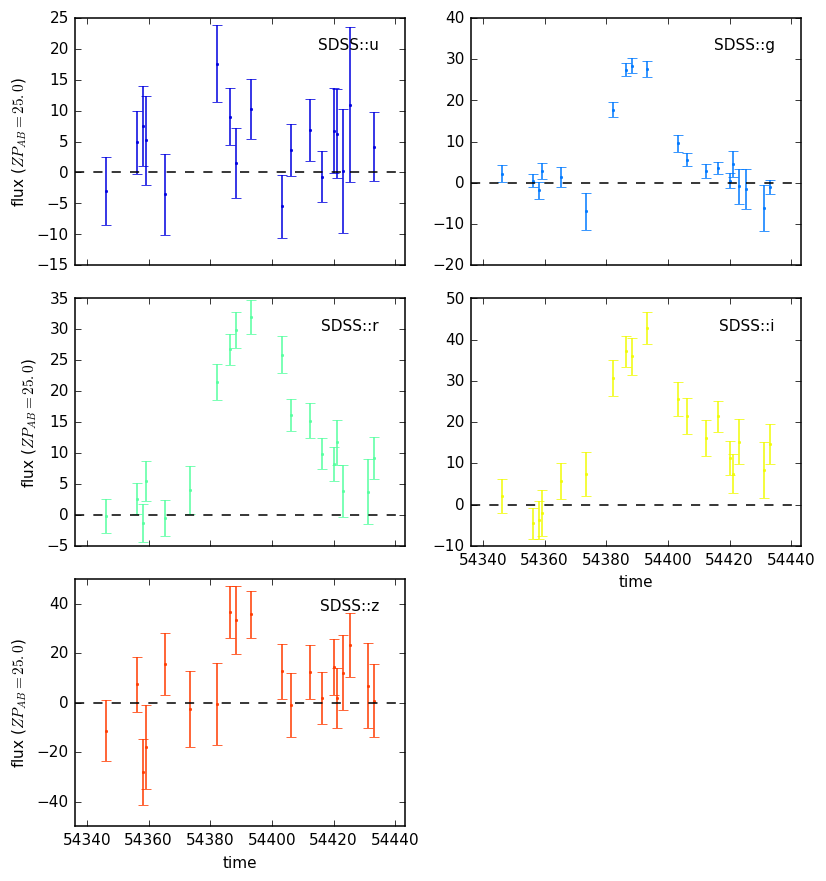

In [5]:
# Quick visualization
sncosmo.plot_lc(data);

### Set up a model

In [6]:
model1 = sncosmo.Model(source='hsiao',
                       effects=[sncosmo.F99Dust()],
                       effect_names=['mw'],
                       effect_frames=['obs'])

In [7]:
print(model1)

source:
  class      : TimeSeriesSource
  name       : 'hsiao'
  version    : 3.0
  phases     : [-20, .., 85] days
  wavelengths: [1000, .., 25000] Angstroms
effect (name='mw' frame='obs'):
  class           : F99Dust
  wavelength range: [909.09, 60000] Angstroms
parameters:
  z         = 0.0
  t0        = 0.0
  amplitude = 1.0
  mwebv     = 0.0


In [8]:
# fix some values
model1.set(mwebv=data.meta['MWEBV'], z=data.meta['Z_HELIO'])

In [9]:
# fit the model to the data
result, model1 = sncosmo.fit_lc(data, model1, ['amplitude', 't0'])

In [10]:
print(result)

   parameters: array([  2.21000000e-01,   5.43893887e+04,   2.93579539e-09,
         4.93000000e-02])
         ndof: 94
 vparam_names: ['t0', 'amplitude']
       errors: OrderedDict([('t0', 0.48749884705466684), ('amplitude', 6.761422046063085e-11)])
        chisq: 130.33678898183265
   covariance: array([[  2.37657005e-01,   2.29240891e-12],
       [  2.29240891e-12,   4.57168281e-21]])
        ncall: 42
      message: 'Minimization exited successfully.'
  param_names: ['z', 't0', 'amplitude', 'mwebv']
      success: True


In [11]:
# access result components:
result.chisq, result.ndof

(130.33678898183265, 94)

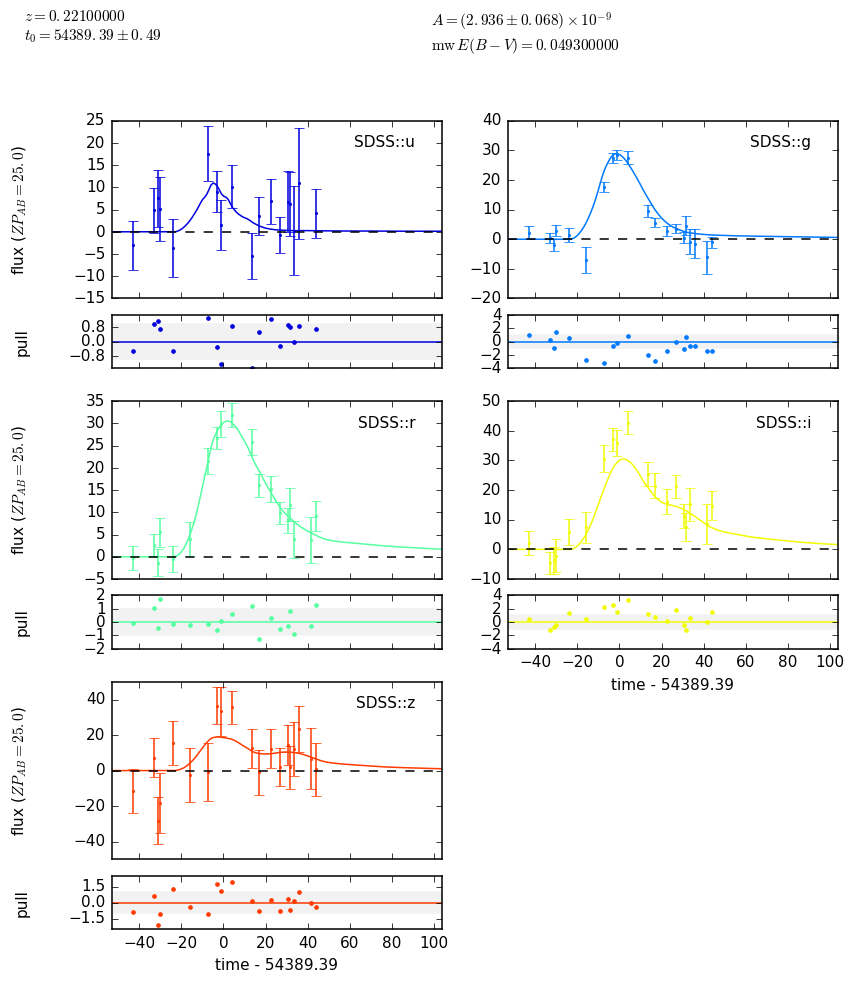

In [12]:
sncosmo.plot_lc(data, model1, errors=result.errors);

### What's happening under the hood?

In [13]:
# here is one row of the data table:
i = 50
print(data['Filter'][i], data['Date'][i], data['ZP'][i], data['MagSys'][i], '-->',
      data['Flux'][i], '+/-', data['Fluxerr'][i])

SDSS::r 54403.168 27.5 AB_B12 --> 259.82 +/- 30.084


In [14]:
# the model can predict the observed flux
model1.bandflux(data['Filter'][i], data['Date'][i], zp=data['ZP'][i], zpsys=data['MagSys'][i])

223.09597977400207

In [15]:
# do it for all rows simultaneously:
predicted_flux = model1.bandflux(data['Filter'], data['Date'], zp=data['ZP'], zpsys=data['MagSys'])
predicted_flux

array([  5.87794936e-18,   1.70998735e-18,   6.16562107e-18,
         1.65913547e-18,   4.17657674e-18,   5.87794936e-18,
         1.70998735e-18,   6.16562107e-18,   1.65913547e-18,
         4.17657674e-18,   5.87794936e-18,   1.70998735e-18,
         6.16562107e-18,   1.65913547e-18,   4.17657674e-18,
         5.87794936e-18,   1.70998735e-18,   6.16562107e-18,
         1.65913547e-18,   4.17657674e-18,  -1.12398626e-01,
        -8.57744375e-02,  -1.01666654e-01,  -7.88334456e-02,
        -1.06503603e-01,   5.38036258e+01,   4.81549654e+01,
         4.92791688e+01,   4.08187039e+01,   2.38337371e+02,
         2.19637390e+02,   2.12156961e+02,   1.69927146e+02,
         8.67963669e+01,   2.89521525e+02,   2.82633177e+02,
         2.78019574e+02,   1.90898056e+02,   9.75707723e+01,
         2.94156310e+02,   2.98254375e+02,   2.98403164e+02,
         1.89338206e+02,   8.14561569e+01,   2.62993741e+02,
         3.03324260e+02,   3.05505352e+02,   1.78239244e+02,
         5.46925281e+01,

sncosmo.fit_lc is using this function to define a likelihood or chisq, then passing that to an optimizer.

### A better model: include color

In [16]:
model2 = sncosmo.Model(source='hsiao',
                       effects=[sncosmo.F99Dust(), sncosmo.F99Dust()],
                       effect_names=['mw', 'host'],
                       effect_frames=['obs', 'rest'])

In [17]:
# fix known values
model2.set(mwebv=data.meta['MWEBV'], z=data.meta['Z_HELIO'])

In [18]:
print(model2)

source:
  class      : TimeSeriesSource
  name       : 'hsiao'
  version    : 3.0
  phases     : [-20, .., 85] days
  wavelengths: [1000, .., 25000] Angstroms
effect (name='mw' frame='obs'):
  class           : F99Dust
  wavelength range: [909.09, 60000] Angstroms
effect (name='host' frame='rest'):
  class           : F99Dust
  wavelength range: [909.09, 60000] Angstroms
parameters:
  z         = 0.221
  t0        = 0.0
  amplitude = 1.0
  mwebv     = 0.049299999999999997
  hostebv   = 0.0


In [19]:
# fit the model to the data
result2, model2 = sncosmo.fit_lc(data, model2, ['amplitude', 'hostebv', 't0'])

In [20]:
print(result2)

   parameters: array([  2.21000000e-01,   5.43893740e+04,   5.48660636e-09,
         4.93000000e-02,   1.77562464e-01])
         ndof: 93
 vparam_names: ['t0', 'amplitude', 'hostebv']
       errors: OrderedDict([('t0', 0.45753466610767646), ('amplitude', 6.208858807242911e-10), ('hostebv', 0.03271831276510176)])
        chisq: 102.12408976650414
   covariance: array([[  2.09339428e-01,   1.03153700e-12,  -1.64790434e-04],
       [  1.03153700e-12,   3.85499277e-19,   1.98953110e-11],
       [ -1.64790434e-04,   1.98953110e-11,   1.07048799e-03]])
        ncall: 100
      message: 'Minimization exited successfully.'
  param_names: ['z', 't0', 'amplitude', 'mwebv', 'hostebv']
      success: True


To plot the data along with the best-fit model, set the model parameters to the best-fit values and plot.

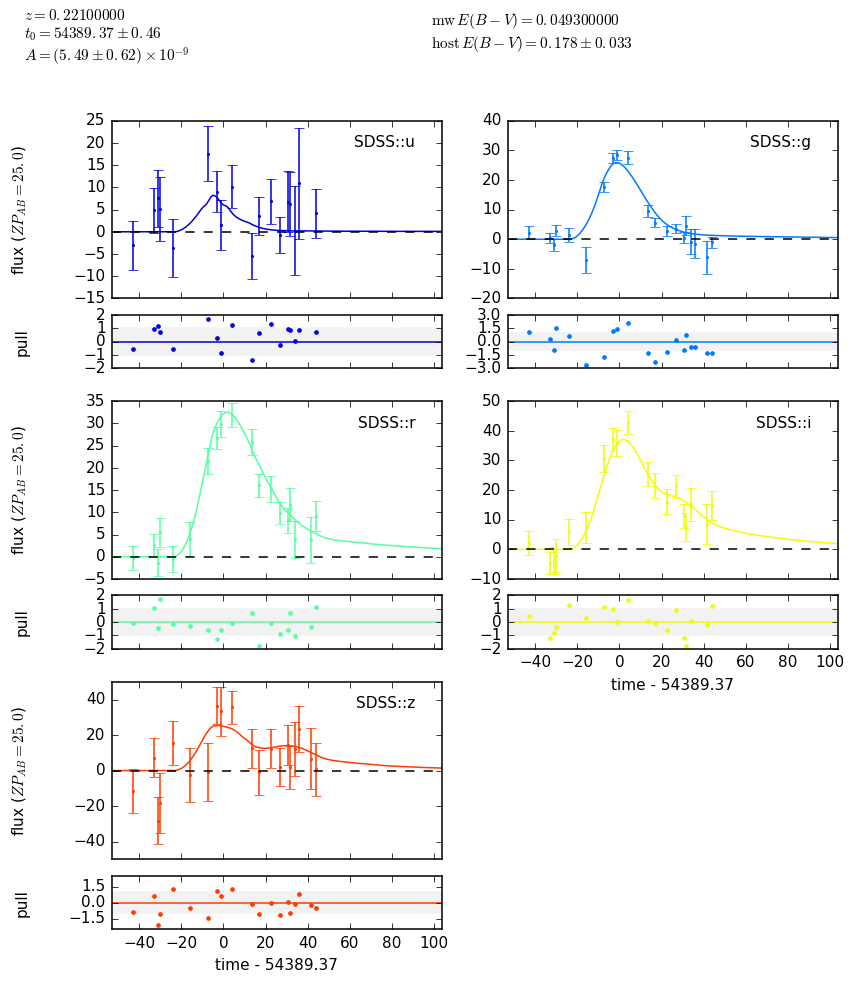

In [21]:
sncosmo.plot_lc(data, model=model2, errors=result2.errors);

### Yet another model

In [22]:
model3 = sncosmo.Model(source='salt2',
                       effects=[sncosmo.F99Dust()],
                       effect_names=['mw'],
                       effect_frames=['obs'])

In [23]:
# fix known values
model3.set(mwebv=data.meta['MWEBV'], z=data.meta['Z_HELIO'])

In [24]:
# fit the model to the data
result3, model3 = sncosmo.fit_lc(data, model3, ['x0', 'x1', 'c', 't0'],
                                 bounds={'x1': (-3., 3.), 'c':(-0.3, 0.3)})

In [25]:
print(result3)

   parameters: array([  2.21000000e-01,   5.43904949e+04,   5.70161580e-05,
        -1.78081770e+00,   4.19691738e-02,   4.93000000e-02])
         ndof: 92
 vparam_names: ['t0', 'x0', 'x1', 'c']
       errors: OrderedDict([('t0', 0.37599233402579557), ('x0', 1.8100857222298228e-06), ('x1', 0.3845857869886593), ('c', 0.03119910931708747)])
        chisq: 87.38127960973966
   covariance: array([[  1.41371178e-01,   1.78729705e-07,  -1.53732884e-02,
         -1.63273733e-03],
       [  1.78729705e-07,   3.27641032e-12,  -4.23399680e-07,
         -2.46677613e-08],
       [ -1.53732884e-02,  -4.23399680e-07,   1.49174508e-01,
          2.73797830e-03],
       [ -1.63273733e-03,  -2.46677613e-08,   2.73797830e-03,
          9.76984855e-04]])
        ncall: 102
      message: 'Minimization exited successfully.'
  param_names: ['z', 't0', 'x0', 'x1', 'c', 'mwebv']
      success: True


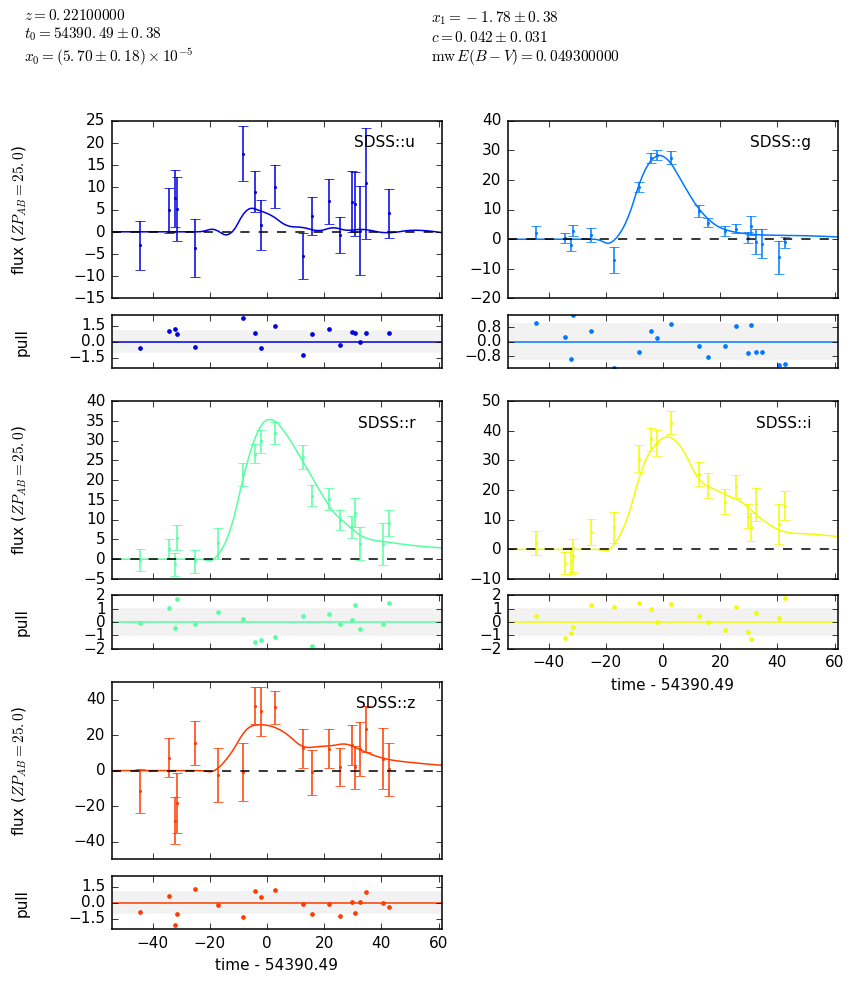

In [26]:
sncosmo.plot_lc(data, model=model3, errors=result3.errors);

### Why are x0 and amplitude so different?

In [27]:
print(model1.get('amplitude'), " versus ", model3.get('x0'))

2.93579539346e-09  versus  5.70161580071e-05


In [28]:
model1.source_peakmag('bessellb', 'vega')

21.300039272013379

In [29]:
model3.source_peakmag('bessellb', 'vega')

21.214945814062244

### Suppose we didn't know the redshift

In [30]:
# fit the model to the data
result4, model3 = sncosmo.fit_lc(data, model3, ['x0', 'x1', 'c', 't0', 'z'],
                                 bounds={'x1': (-3., 3.), 'c':(-0.3, 0.3), 'z':(0.25, 0.45)})

In [31]:
result4.ncall

196

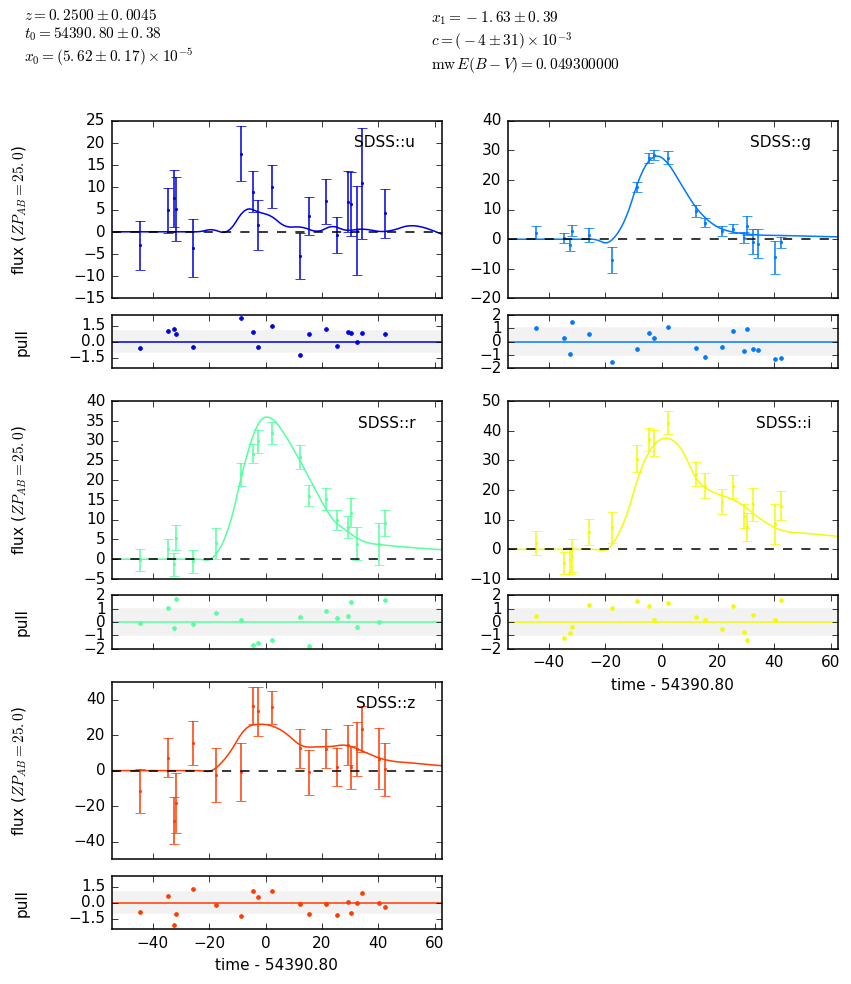

In [32]:
sncosmo.plot_lc(data, model=model3, errors=result4.errors);

## Sampling

In [33]:
# takes about a minute
result, model3 = sncosmo.mcmc_lc(data, model3, ['x0', 'x1', 'c', 't0', 'z'],
                                 bounds={'x1': (-3., 3.), 'c':(-0.3, 0.3), 'z':(0.05, 0.45)},
                                 nwalkers=50, nburn=100, nsamples=400)

/home/kyle/code/sncosmo/build/lib.linux-x86_64-3.5/sncosmo/fitting.py:133: RuntimeWarning: Dropping following bands from data: 'SDSS::z'(out of model wavelength range)
  "(out of model wavelength range)", RuntimeWarning)


In [34]:
print(result)

               parameters: array([  2.01829146e-01,   5.43903350e+04,   5.61541689e-05,
        -1.73412703e+00,   7.11362907e-02,   4.93000000e-02])
             vparam_names: ['z', 't0', 'x0', 'x1', 'c']
 mean_acceptance_fraction: 0.53189999999999993
                   errors: OrderedDict([('z', 0.027829228213776012), ('t0', 0.42350223781711555), ('x0', 1.9510570188825643e-06), ('x1', 0.41409090811361071), ('c', 0.050780067817480498)])
              param_names: ['z', 't0', 'x0', 'x1', 'c', 'mwebv']
               covariance: array([[  7.74465943e-04,   5.25700305e-03,   1.64845565e-08,
          3.10801533e-03,  -1.09197043e-03],
       [  5.25700305e-03,   1.79354145e-01,   2.88119346e-07,
          1.06211733e-03,  -8.78487093e-03],
       [  1.64845565e-08,   2.88119346e-07,   3.80662349e-12,
         -3.64794887e-07,  -4.93556039e-08],
       [  3.10801533e-03,   1.06211733e-03,  -3.64794887e-07,
          1.71471280e-01,  -1.05024410e-03],
       [ -1.09197043e-03,  -8.78487093

In [35]:
import corner

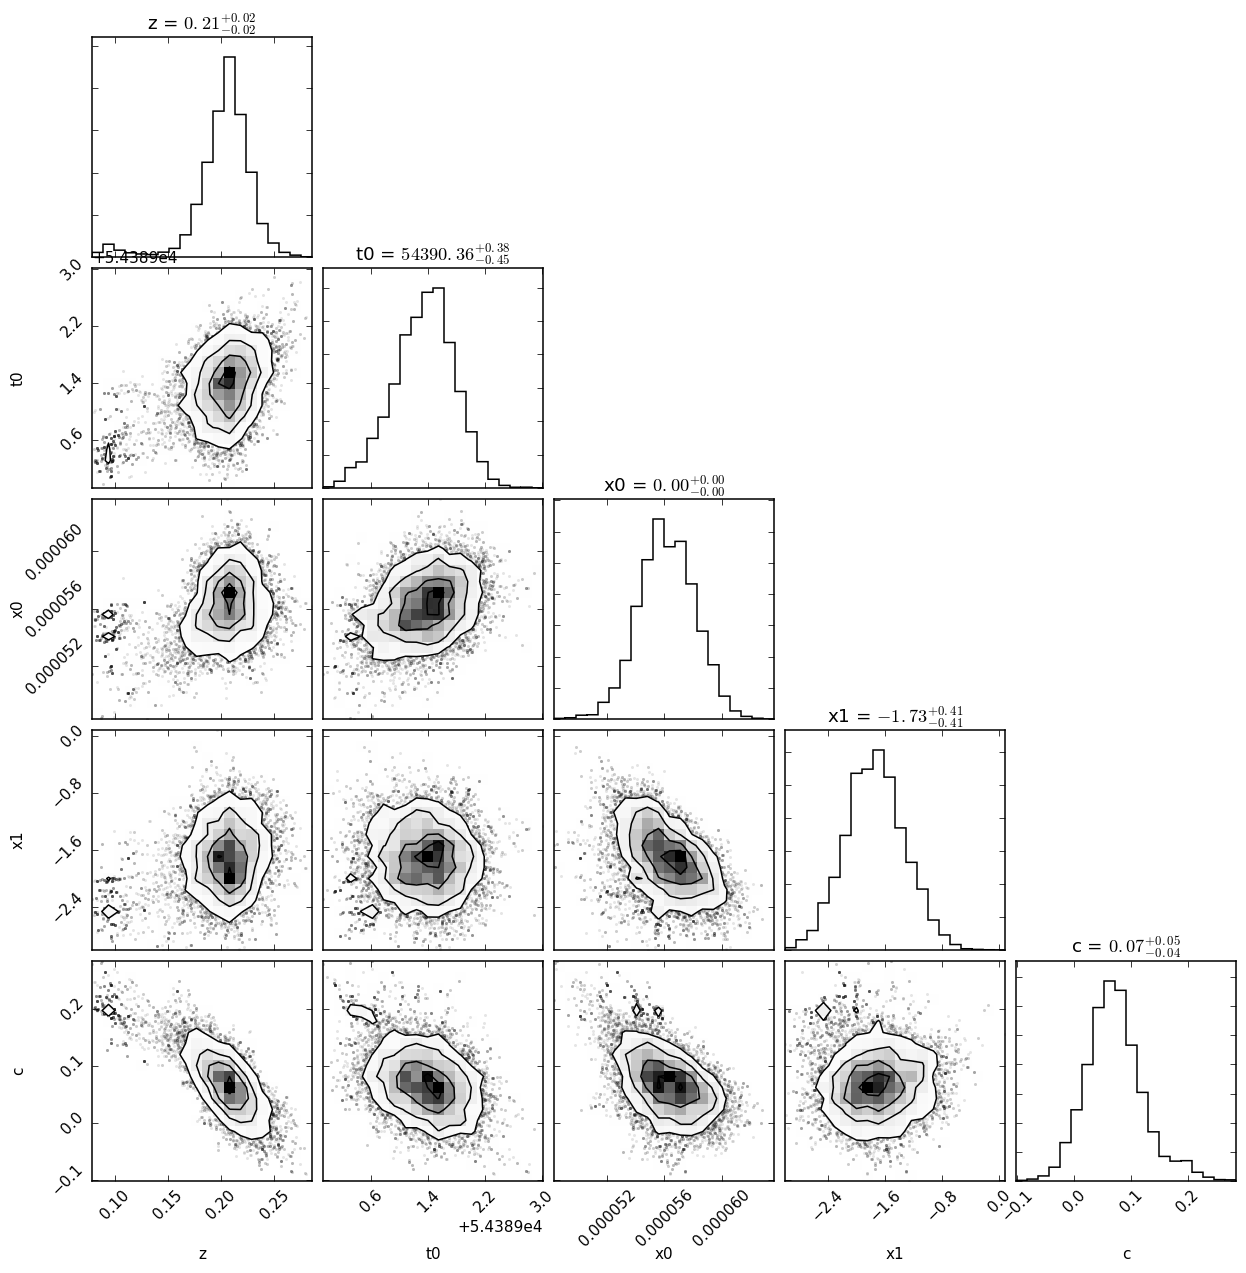

In [36]:
corner.corner(result.samples, bins=20, labels=result.vparam_names, show_titles=True);